# Step 1. Big Picture & Setup (See the slides)

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [216]:
import sys
import sklearn 
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Step 2. Get the data

In [217]:
import pandas as pd # Pandas module to enable data manipulation

# CRIM - per capita crime rate by town 
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    return pd.read_csv(csv_path, header=None, delimiter=r"\s+", names=column_names)

housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [218]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [219]:
# Provide some basic statistics about the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


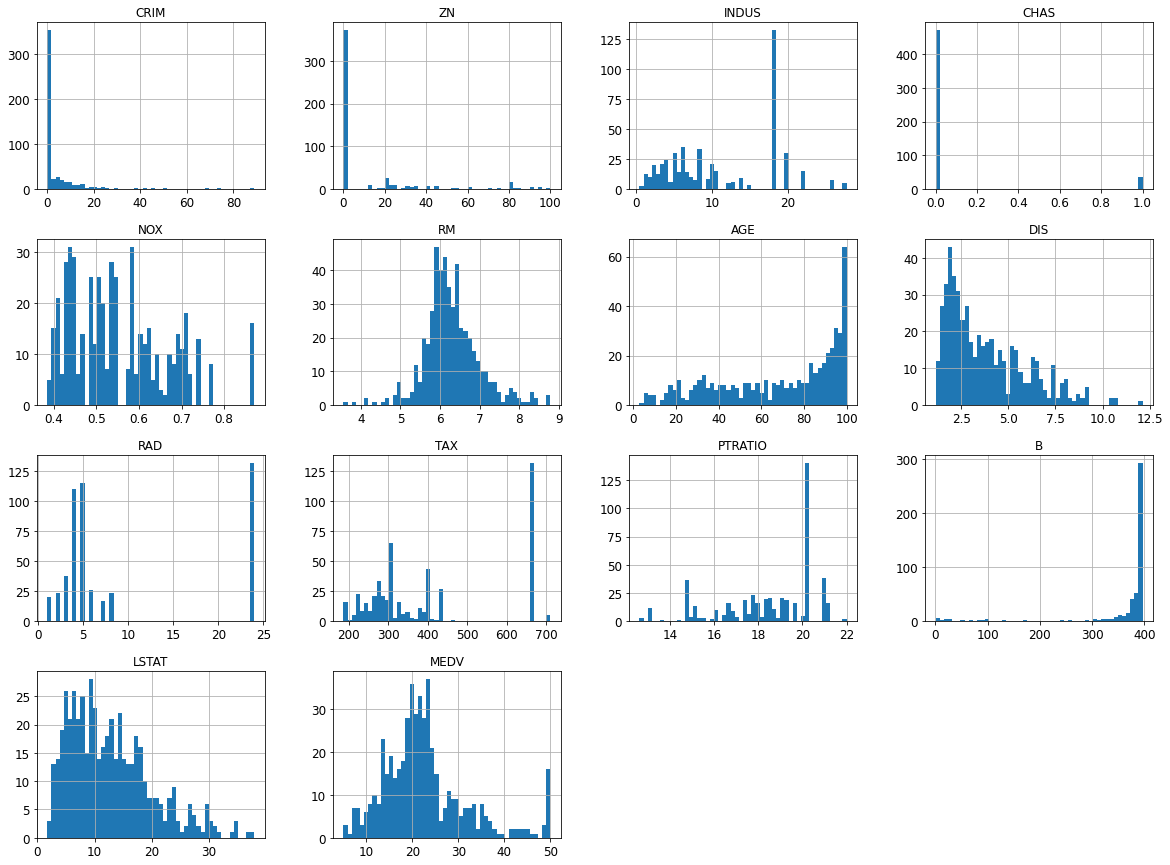

In [220]:
housing.hist(bins=50, figsize=(20,15))
plt.show()
#save_fig("attribute_histogram_plots")


In [221]:
corr = housing.corr()
corr.shape

(14, 14)

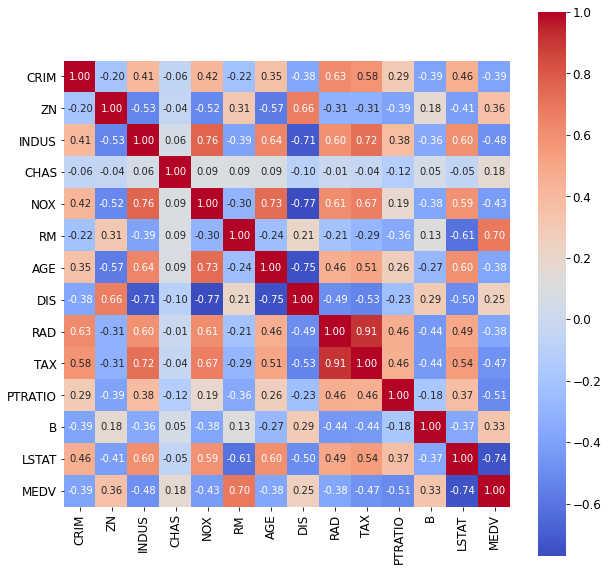

In [222]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, fmt='.2f', annot=True, cmap='coolwarm')
# LSTAT and RM have the highest correlation with MEDV
# Some multi-collinearity present, especially with RAD and TAX

Text(0, 0.5, 'TAX')

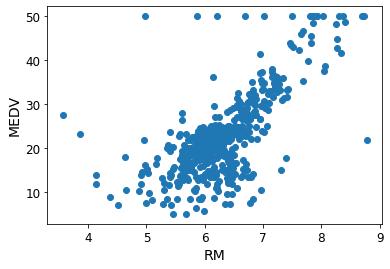

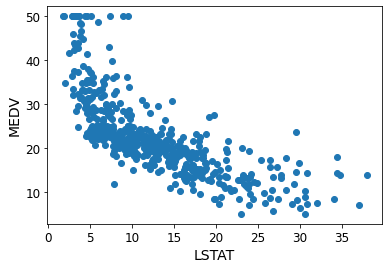

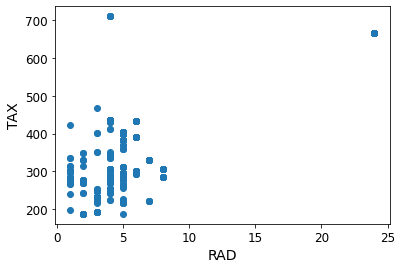

In [223]:
plot1 = plt.figure(1)
plt.scatter(housing['RM'], housing['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')

plot2 = plt.figure(2)
plt.scatter(housing['LSTAT'], housing['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')


# multi-collinearity
plot3 = plt.figure(3)
plt.scatter(housing['RAD'], housing['TAX'])
plt.xlabel('RAD')
plt.ylabel('TAX')


In [224]:
skew = housing.skew()
skew

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

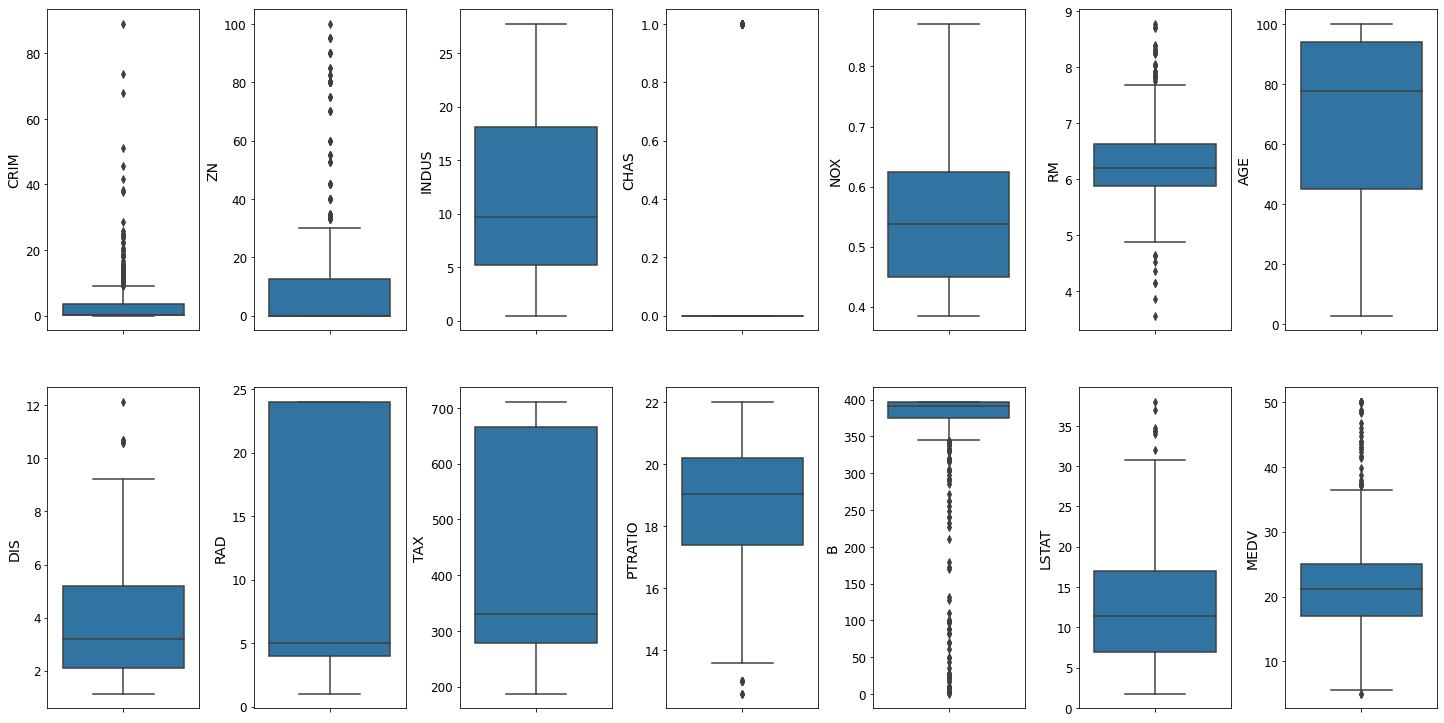

In [225]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
i = 0
ax = ax.flatten()

for col, value in housing.items():
    sns.boxplot(y=col, data=housing, ax=ax[i])
    i += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

## Look for outliers in the dataset and get rid of them 

In [226]:
from scipy import stats
z = np.abs(stats.zscore(housing.loc[:, housing.columns != 'CHAS']))


print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 199, 200, 201, 202, 203, 204, 225, 256,
       257, 262, 283, 284, 347, 351, 352, 353, 353, 354, 355, 364, 365,
       367, 373, 374, 374, 380, 398, 404, 405, 406, 410, 410, 411, 412,
       412, 414, 414, 415, 416, 418, 418, 419, 423, 424, 425, 426, 427,
       427, 429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 10, 11,  1,  1,  1,  1,  1,  1,  4,  1,  4,  4,  1,  1,
        1,  6,  6,  1,  6,  6,  6,  4,  4,  4, 11,  4, 11,  0,  0,  0,  0,
        4,  0, 10, 10, 10, 11,  0, 11, 10, 10,  0, 10, 10, 10, 10, 10, 10,
        0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


In [227]:
housing = housing[(z < 3).all(axis=1)]

housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


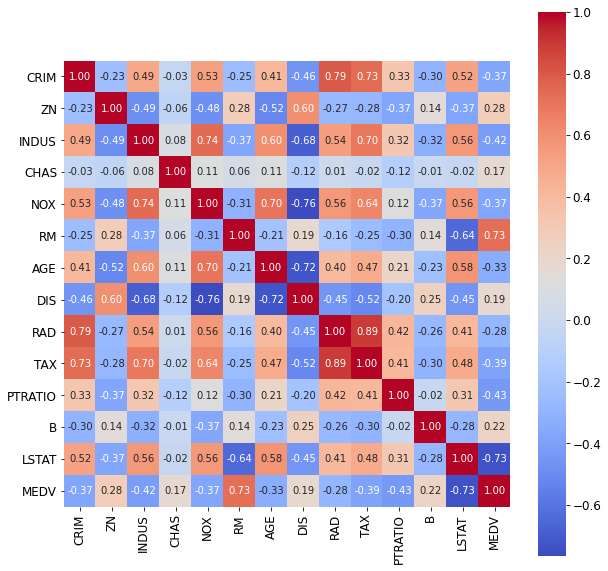

In [228]:
corr = housing.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, fmt='.2f', annot=True, cmap='coolwarm')
# LSTAT and RM have the highest correlation with MEDV
# Some multi-collinearity present, especially with RAD and TAX

In [229]:
from sklearn.model_selection import train_test_split

X,y = housing.iloc[:,:-1], housing.iloc[:,-1]
# Split the data into train set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
print( X_train.shape )
print( X_test.shape ) 
print(y_train.shape)
print(y_test.shape)# No peeking at the test data though (data snooping bias)

(358, 13)
(90, 13)
(358,)
(90,)


In [231]:
xg_reg = XGBRegressor(random_state=42)
xg_reg.fit(X_train, y_train)

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

mlp_reg = MLPRegressor(random_state=42)
mlp_reg.fit(X_train, y_train)

[03:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [232]:
y_predict_xg = xg_reg.predict(X_train)
y_predict_forest = forest_reg.predict(X_train)
y_predict_mlp = mlp_reg.predict(X_train)


In [233]:
from sklearn import metrics

print('XGBoost RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_predict_xg)))
print('Random Forest RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_predict_forest)))
print('MLP RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_predict_mlp)))


XGBoost RMSE:  1.4879105095344647
Random Forest RMSE:  1.3829381734626134
MLP RMSE:  5.287783192068728


In [234]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

xg_scores = cross_val_score(xg_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
xg_rmse_scores = np.sqrt(-xg_scores)


[03:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [235]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#RMSE scores better 
display_scores(forest_rmse_scores)
display_scores(xg_rmse_scores)

Scores: [3.33616888 2.91283881 4.39743792 2.96494753 4.69044798]
Mean: 3.660368224249556
Standard deviation: 0.7418694510936283
Scores: [2.95041933 3.14513161 3.47052858 3.03451612 3.73739496]
Mean: 3.26759812335582
Standard deviation: 0.29387667060630596


Text(0.5, 0, 'XGBoost feature importance')

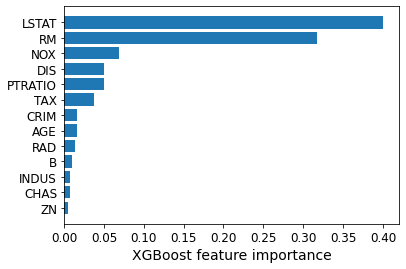

In [236]:
sorted = xg_reg.feature_importances_.argsort()
plt.barh(X_train.columns[sorted], xg_reg.feature_importances_[sorted])

plt.xlabel("XGBoost feature importance")


In [237]:
from sklearn.base import BaseEstimator, TransformerMixin

crim_ix, lstat_ix, rm_ix, ptratio_ix = 0, 12, 5, 10

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_lstat_crime = True): # no *args or **kargs
        self.add_lstat_crime = add_lstat_crime
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        ptratio_rooms = X[:, rm_ix] * X[:, ptratio_ix]
        if self.add_lstat_crime:
          lstat_crime = X[:, crim_ix] / X[:, lstat_ix]
          return np.c_[X, ptratio_rooms, lstat_crime]
        else:
            return np.c_[X, ptratio_rooms]

# When set to false, that feature will not be added --> so here it adds two features only
attr_adder = CombinedAttributesAdder(add_lstat_crime=True)
housing_extra_attribs = attr_adder.transform(X_train.values)

In [238]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])


# for context, this is done above but this is what X_train is
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

housing_train = num_pipeline.fit_transform(X_train.values)

In [239]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing)
# cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        # ("cat", OneHotEncoder(), cat_attribs),
    ])


# doesn't work ?? 
# housing_prepared = full_pipeline.fit_transform(housing.values)

In [244]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# train across 5 folds, that's a total of 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [245]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [246]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

X_test_prepared = num_pipeline.transform(X_test.values)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


2.6603441483489165

In [247]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.11256195, 3.59403226])

In [248]:
df = pd.DataFrame(X_test_prepared, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIMRATIO', 'PTRATIO'])

Text(0.5, 0, 'XGBoost feature importance')

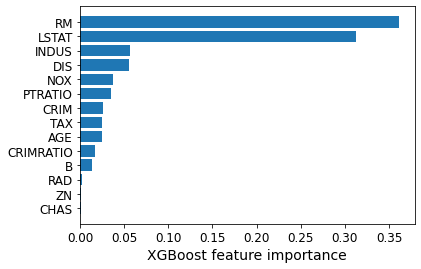

In [249]:
sorted = final_model.feature_importances_.argsort()
plt.barh(df.columns[sorted], final_model.feature_importances_[sorted])

plt.xlabel("XGBoost feature importance")

# Step 3. Discover and visualize the data to gain insights

###Feature Engineering: 
Depends on the context of the problem, sometime we can combine some features to create a hopfully better one.

# Step 4. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

Check that this is the same as manually computing the median of each attribute:

Transform the training set:

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. 

We can compute a 95% confidence interval for the test RMSE:

# Step 7. Present your solution (see the slides)

# Step 8. Launch, maintain, and update (see the slides)